In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


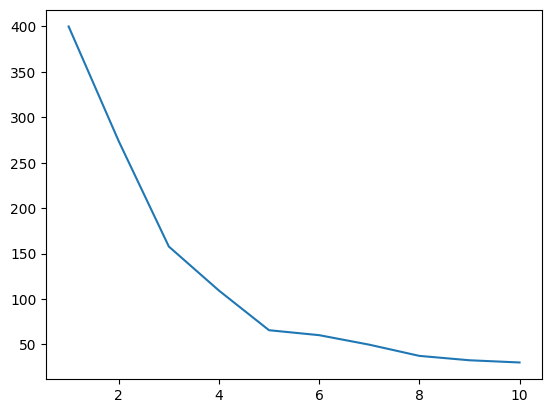

In [3]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia)
plt.show()


In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


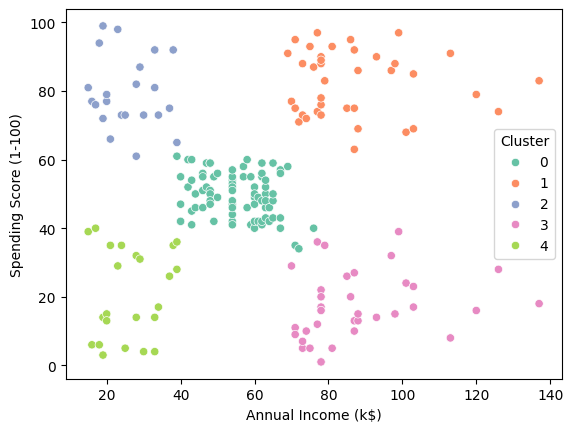

In [5]:
sns.scatterplot(
    x=X.iloc[:,0], y=X.iloc[:,1],
    hue=df['Cluster'], palette="Set2"
)
plt.show()


In [7]:
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043
